In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
# 加载数据
X, y = load_iris(return_X_y=True)

# 切分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# 构建一个模型
model = DecisionTreeClassifier(max_depth=2)

# 训练模型
model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

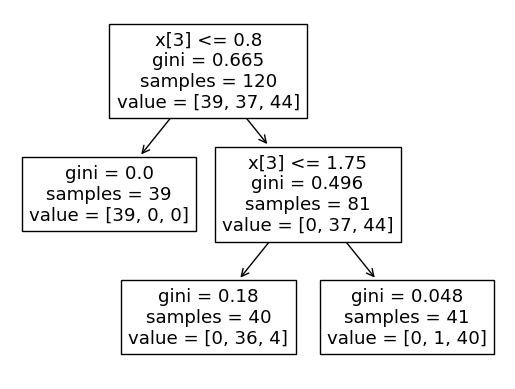

In [4]:
# 绘制训练好的决策树
plot_tree(model)

In [5]:
import numpy as np

In [6]:
def get_gini(y):
    """
        根据标签，计算基尼系数
    """
    unique_values, unique_value_counts = np.unique(y, return_counts=True)
    p = unique_value_counts / y.size
    gini = 1 - (p ** 2).sum()
    return gini


In [7]:
get_gini(y_train)

0.6648611111111111

In [8]:
"""
    穷举思想
"""
# 记录最好的结果
best_feature_idx = None
best_feature_value = None
best_gini = None

# 野蛮遍历
for feature_idx in range(4):
    print(feature_idx)
    values = set(X_train[:, feature_idx])
    for value in values:
        # 向左走
        X_left = X_train[X_train[:, feature_idx] <= value]
        y_left = y_train[X_train[:, feature_idx] <= value]
        weight_left = len(y_left) / len(y_train)
        gini_left = get_gini(y_left)

        # 向右走
        X_right = X_train[X_train[:, feature_idx] > value]
        y_right = y_train[X_train[:, feature_idx] > value]
        weight_right = len(y_right) / len(y_train)
        gini_right = get_gini(y_right)

        # 总的gini
        gini_all = gini_left * weight_left  + gini_right * weight_right

        # 结果更新
        if best_gini:
            if gini_all <= best_gini:
                best_feature_idx = feature_idx
                best_feature_value = value
                best_gini = gini_all
        else:
            best_feature_idx = feature_idx
            best_feature_value = value
            best_gini = gini_all

0
1
2
3


In [9]:
# 打印结果
print(best_feature_idx, best_feature_value, best_gini)

3 0.6 0.3349794238683128


In [10]:
set(X_train[:, 3])

{0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5}

In [11]:
y_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [12]:
import numpy as np

In [13]:
P = np.array([(y_train == idx).sum() for idx in range(3)]) / y_train.size
P

array([0.325     , 0.30833333, 0.36666667])

In [14]:
entropy = -(P * np.log2(P)).sum()
entropy

1.5810951599090195

In [15]:
P

array([0.325     , 0.30833333, 0.36666667])

In [16]:
1 - (P ** 2).sum()

0.6648611111111111

In [17]:
# 模型推理
y_pred = model.predict(X=X_test)

In [18]:
# 模型评估
acc = (y_pred == y_test).mean()
acc

0.9666666666666667

In [19]:
from sklearn.datasets import make_regression

In [20]:
X, y = make_regression(n_samples=100, n_features=4, random_state=0)

In [21]:
y

array([ -41.77258625,    3.74472441,  -95.65682744,  -25.08192828,
         27.44619319,  -31.99344805,   55.48997253, -102.29460447,
        -42.43181951,  109.24823366, -115.51683681,  101.75811405,
        -64.62792903,  -30.3170985 , -149.1655967 ,  -63.09051586,
       -112.38464968, -160.04560924,   22.91181558,   -8.14531906,
         43.82709884,  120.87813017,  153.36894347,  105.16466554,
        -96.67742181,  -29.49942263,  295.94941508,  -69.29376764,
         51.55987251,   79.10680228,  125.47144275,    1.58487072,
          9.9736833 ,  123.86299832, -151.12199636,   91.82363042,
         -6.40848085,  125.34555547, -199.72080859, -293.24954525,
        107.34834095,  -20.42851377,  100.04923452,   94.48197546,
       -112.02609264,  -36.21806093,  117.59200578, -219.83343312,
        -53.7541338 ,   94.30524146, -129.90498267,   50.34456748,
        161.67542836,  313.03644793, -154.28738026,  -66.87932541,
         58.17002978,  -61.80605604,  -79.64440992,   62.47557

In [22]:
# 切分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
model = DecisionTreeRegressor(max_depth=3)

In [25]:
model.fit(X=X_train, y=y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'x[3] <= -0.26\nsquared_error = 12527.615\nsamples = 80\nvalue = -2.109'),
 Text(0.25, 0.625, 'x[3] <= -1.268\nsquared_error = 6520.436\nsamples = 22\nvalue = -121.612'),
 Text(0.125, 0.375, 'x[1] <= -0.918\nsquared_error = 1078.446\nsamples = 5\nvalue = -231.272'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = -293.25'),
 Text(0.1875, 0.125, 'squared_error = 147.696\nsamples = 4\nvalue = -215.778'),
 Text(0.375, 0.375, 'x[2] <= -1.286\nsquared_error = 3543.869\nsamples = 17\nvalue = -89.359'),
 Text(0.3125, 0.125, 'squared_error = 2701.53\nsamples = 2\nvalue = -212.022'),
 Text(0.4375, 0.125, 'squared_error = 1382.532\nsamples = 15\nvalue = -73.004'),
 Text(0.75, 0.625, 'x[1] <= -0.265\nsquared_error = 7334.59\nsamples = 58\nvalue = 43.22'),
 Text(0.625, 0.375, 'x[2] <= -0.259\nsquared_error = 5273.326\nsamples = 26\nvalue = -11.822'),
 Text(0.5625, 0.125, 'squared_error = 1721.669\nsamples = 15\nvalue = -59.613'),
 Text(0.6875, 0.125, 'squared_erro

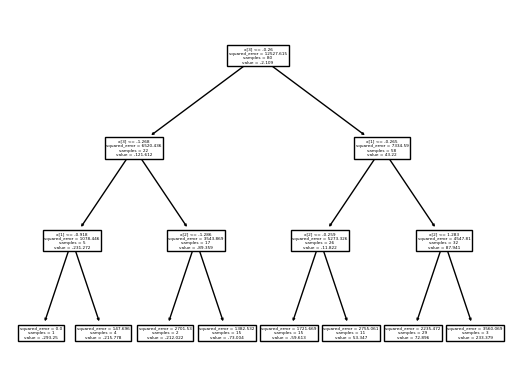

In [26]:
plot_tree(model)

In [27]:
"""
    穷举思想
"""

def get_var(y):
    """
        计算数据的方差
    """
    return 0 if len(y) < 2 else np.var(y) 

# 记录最好的结果
best_feature_idx = None
best_feature_value = None
best_var = None

# 野蛮遍历
for feature_idx in range(4):
    values = set(X_train[:, feature_idx])
    for value in values:
        # 向左走
        X_left = X_train[X_train[:, feature_idx] <= value]
        y_left = y_train[X_train[:, feature_idx] <= value]
        weight_left = len(y_left) / len(y_train)
        var_left = get_var(y_left)

        # 向右走
        X_right = X_train[X_train[:, feature_idx] > value]
        y_right = y_train[X_train[:, feature_idx] > value]
        weight_right = len(y_right) / len(y_train)
        var_right = get_var(y_right)

        # 总的var
        var_all = var_left * weight_left  + var_right * weight_right

        # 结果更新
        if best_var:
            if var_all <= best_var:
                best_feature_idx = feature_idx
                best_feature_value = value
                best_var = var_all
        else:
            best_feature_idx = feature_idx
            best_feature_value = value
            best_var = var_all

In [28]:
x = np.array([])

In [29]:
x.var()

C:\Users\pkulx\AppData\Local\Temp\ipykernel_15792\2968726291.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  x.var()
d:\software\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
d:\software\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

In [30]:
print(best_feature_idx)
print(best_feature_value)
print(best_var)

3
-0.2977908794017283
7110.697585743487


In [31]:
set(X_train[:, 3])

{-2.77259275642665,
 -2.2234031522244266,
 -1.7262826023316769,
 -1.5447710967776116,
 -1.3467175057975553,
 -1.188944955203736,
 -1.0930615087305058,
 -1.0225068436356035,
 -0.7614922118116233,
 -0.7474548114407578,
 -0.7421650204064419,
 -0.7380309092056887,
 -0.6848100909403132,
 -0.6634782863621074,
 -0.5757879698130661,
 -0.49331988336219407,
 -0.4810271184607877,
 -0.43782004474443403,
 -0.41004969320254847,
 -0.3909533751876011,
 -0.3627411659871381,
 -0.2977908794017283,
 -0.2226751005151545,
 -0.1871838500258336,
 -0.1715463312222481,
 -0.1513572082976979,
 -0.10730527629117469,
 -0.05256729626954629,
 -0.04225715166064269,
 0.01747915902505673,
 0.052165079260974405,
 0.05616534222974544,
 0.0875512413851909,
 0.08842208704466141,
 0.094351589317074,
 0.12898291075741067,
 0.15670385527236397,
 0.23218103620027578,
 0.26705086934918293,
 0.31721821519130206,
 0.33367432737426683,
 0.339964983801262,
 0.37005588784751875,
 0.37816251960217356,
 0.40198936344470165,
 0.46278225

In [32]:
model

DecisionTreeRegressor(max_depth=3)

In [33]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [34]:
res = model.decision_path(X_test[0:2])

In [35]:
# 转换为稠密矩阵
res.toarray()



array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [36]:
y_train.mean()

-2.1089732228803277

In [37]:
y_train.var()

12527.615365314592